In [1]:
import pandas as pd

In [22]:
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns


In [2]:
from util import util_experiment_juris_tcu_index as util_experiment 

In [3]:
from util import util_pipeline

OpenAI tiktoken module is not available for Python < 3.8,Linux ARM64 and AARCH64. Falling back to GPT2TokenizerFast.


In [4]:
import importlib

In [5]:
DATASET = 'juris_tcu_index'

In [6]:
importlib.reload(util_experiment)

<module 'util.util_experiment_juris_tcu_index' from '/home/borela/fontes/ind-ir/code/util/util_experiment_juris_tcu_index.py'>

In [7]:
path_search_experiment =  f'../data/search/{DATASET}/search_experiment_{DATASET}.csv'
path_search_result =  f'../data/search/{DATASET}/search_experiment_result_{DATASET}.csv'

# Del experiments

In [2]:
# util_experiment.del_experiment_value_column(column_name='CRITERIA',column_value='total_gte_5', parm_dataset='juris_tcu_index')

Excluindo CRITERIA = total_gte_5
Records to be deleted in df_experiment: 7
Records to be deleted in df_experiment_result: 700
Records successfully deleted.


In [ ]:
# util_experiment.del_experiment_result(time_key='2023-Jun-16 19:49:19', parm_dataset='juris_tcu_index')

Records to be deleted in df_experiment: 1
Records to be deleted in df_experiment_result: 100
Records successfully deleted.


In [4]:
# for value in valores_time_com_query_id_invalido:
#    util_experiment.del_experiment_value_column(column_name='TIME',column_value=value, parm_dataset='juris_tcu_index',parm_confirm=False)
    

reorder columns of experiments

In [8]:

# Leitura do arquivo CSV existente
df_experiment = pd.read_csv(path_search_experiment)


In [9]:
df_experiment['RANKER_MODEL_NAME'].unique()

array(['unicamp-dl/mt5-3B-mmarco-en-pt', nan,
       'unicamp-dl/mMiniLM-L6-v2-pt-v2',
       'unicamp-dl/ptt5-base-pt-msmarco-100k-v2',
       'unicamp-dl/ptt5-base-pt-msmarco-100k-v2-1400',
       'unicamp-dl/mMiniLM-L6-v2-pt-v2-5500',
       'unicamp-dl/mMiniLM-L6-v2-pt-v2-19000',
       'unicamp-dl/ptt5-base-pt-msmarco-100k-v2-7600',
       'unicamp-dl/ptt5-base-pt-msmarco-100k-v2-lim100-1700',
       'unicamp-dl/ptt5-base-pt-msmarco-100k-v2-lim50-800',
       'unicamp-dl/ptt5-base-pt-msmarco-100k-v2-lim50-2200',
       'unicamp-dl/mMiniLM-L6-v2-pt-v2-indir-400-pcte',
       'unicamp-dl/ptt5-base-pt-msmarco-100k-v2-indir-5200',
       'unicamp-dl/ptt5-base-pt-msmarco-100k-v2-indir-79-pcte',
       'unicamp-dl/ptt5-base-pt-msmarco-100k-v2-indir-106-pcte'],
      dtype=object)

In [16]:
list_model = ['unicamp-dl/mMiniLM-L6-v2-pt-v2',
              'unicamp-dl/ptt5-base-pt-msmarco-100k-v2',
              'unicamp-dl/mt5-3B-mmarco-en-pt', 
              'unicamp-dl/mMiniLM-L6-v2-pt-v2-indir-400-pcte',
              'unicamp-dl/ptt5-base-pt-msmarco-100k-v2-indir-106-pcte'
              ]

In [10]:
dict_ranker_dado_nome = {v['model_name']: k for k, v in util_pipeline.dict_ranker.items()}


ACRESCENTAR SÓ BM25

CRIAR GRÁFICO DE COMPARAÇÃO DE RETRIEVES STS_MULTHOP para gerar gráfico de comparação de retrievers com esse rerenker

In [17]:
df_select = df_experiment[(df_experiment['RANKER_MODEL_NAME'].isin(list_model))&(df_experiment['RETRIEVER_TYPE']=='bm25')]

In [27]:
df_select.head()

,TIME,COUNT_QUERY_RUN,COUNT_QUERY_WITHOUT_RESULT,COUNT_QUERY_NOT_FOUND,TOPK_RETRIEVER,TOPK_RANKER,RANK1_MEAN,NDCG_LIMIT,NDCG_MEAN,TIME_SPENT_MEAN,CRITERIA,RETRIEVER_TYPE,RETRIEVER_MODEL_NAME,RANKER_MODEL_NAME,RANKER_TYPE
25,2023-Jun-24 08:32:11,100,0.0,0.0,300,0.0,4.610,12,51.971,0.035,area,bm25,NaN,unicamp-dl/mMiniLM-L6-v2-pt-v2,MINILM
27,2023-Jun-24 08:33:33,100,0.0,4.0,300,0.0,53.042,12,32.499,0.764,theme,bm25,NaN,unicamp-dl/mMiniLM-L6-v2-pt-v2,MINILM
29,2023-Jun-24 08:36:11,100,0.0,31.0,300,0.0,74.420,12,22.944,0.791,subtheme,bm25,NaN,unicamp-dl/mMiniLM-L6-v2-pt-v2,MINILM
31,2023-Jun-24 08:38:50,100,0.0,14.0,300,0.0,57.767,12,11.498,0.800,extra,bm25,NaN,unicamp-dl/mMiniLM-L6-v2-pt-v2,MINILM
33,2023-Jun-24 08:41:30,100,0.0,1.0,300,0.0,16.727,12,23.082,0.799,total,bm25,NaN,unicamp-dl/mMiniLM-L6-v2-pt-v2,MINILM


In [18]:
df_select['RANKER_TYPE'] = df_select['RANKER_MODEL_NAME'].map(dict_ranker_dado_nome)

/home/borela/miniconda3/envs/relevar-busca/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_select['RANKER_TYPE'].unique()

array(['MT5_3B', 'MINILM', 'PTT5_BASE', 'MINILM_INDIR_400',
       'PTT5_INDIR_106'], dtype=object)

In [20]:
# Definir a ordem desejada
ranker_type_order = ['MINILM', 'PTT5_BASE', 'MT5_3B', 'MINILM_INDIR_400', 'PTT5_INDIR_106']

# Criar uma categoria ordenada
ranker_type_category = pd.CategoricalDtype(categories=ranker_type_order, ordered=True)

# Ordenar o DataFrame
df_select['RANKER_TYPE'] = df_select['RANKER_TYPE'].astype(ranker_type_category)
df_select = df_select.sort_values('RANKER_TYPE')


/home/borela/miniconda3/envs/relevar-busca/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


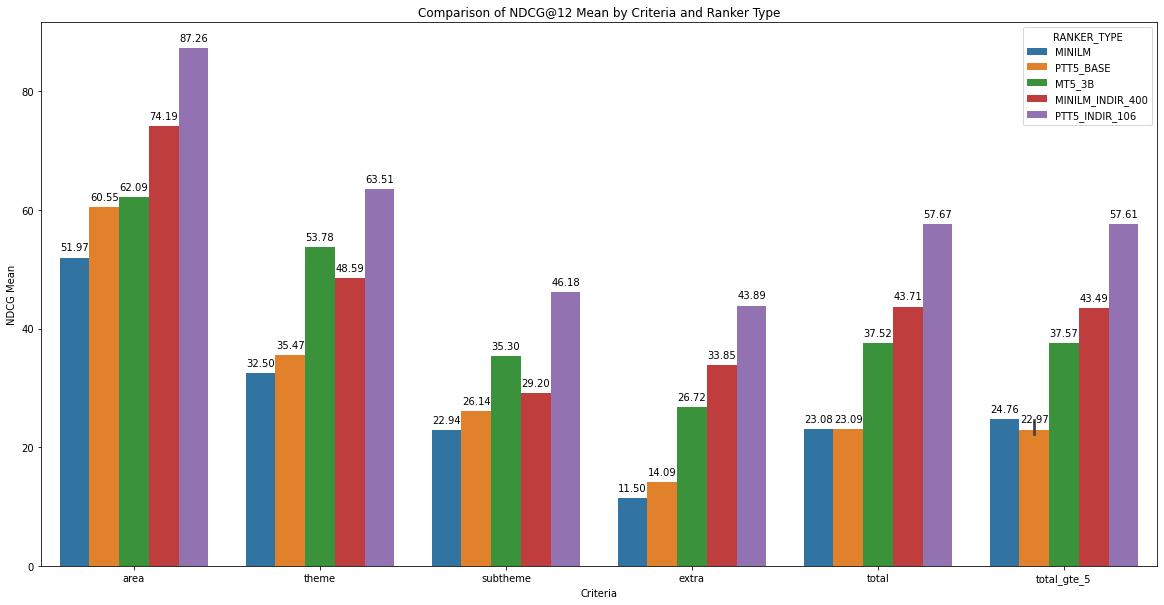

In [25]:
plt.figure(figsize=(20, 10))

ax = sns.barplot(data=df_select, x='CRITERIA', y='NDCG_MEAN', hue='RANKER_TYPE')

# Adicionar os valores das barras no topo
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

plt.xlabel('Criteria')
plt.ylabel('NDCG Mean')
plt.title('Comparison of NDCG@12 Mean by Criteria and Ranker Type')
plt.show()

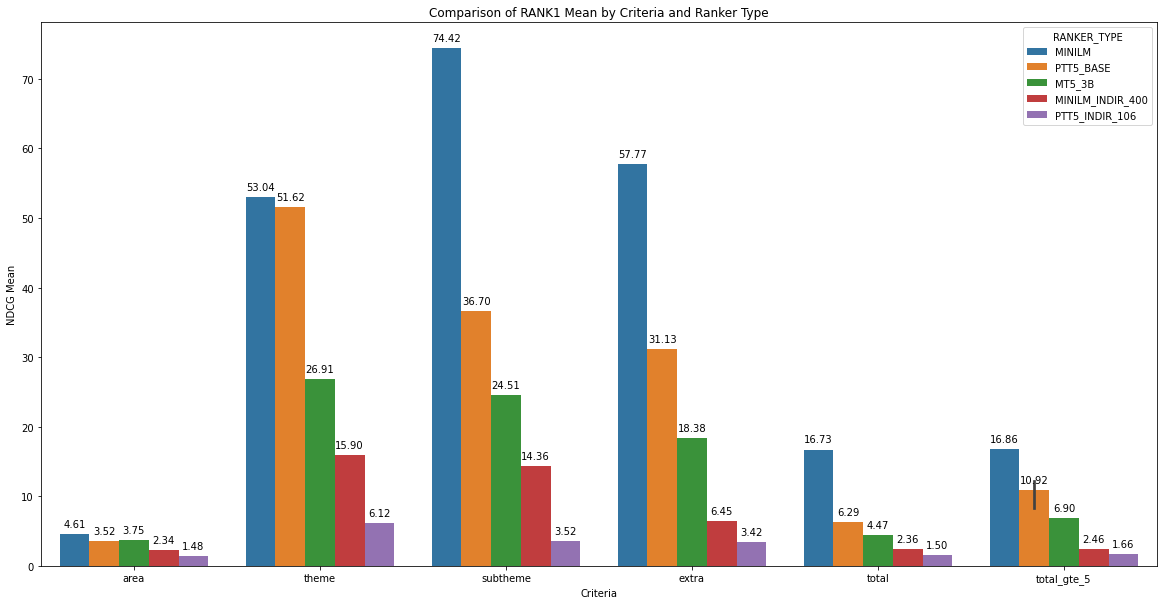

In [26]:
plt.figure(figsize=(20, 10))

ax = sns.barplot(data=df_select, x='CRITERIA', y='RANK1_MEAN', hue='RANKER_TYPE')

# Adicionar os valores das barras no topo
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

plt.xlabel('Criteria')
plt.ylabel('NDCG Mean')
plt.title('Comparison of RANK1 Mean by Criteria and Ranker Type')
plt.show()


In [69]:
df_experiment_result = pd.read_csv(path_search_result)

In [70]:
df_experiment.shape

(217, 14)

In [71]:
df_experiment.head()

,TIME,COUNT_QUERY_RUN,COUNT_QUERY_WITHOUT_RESULT,COUNT_QUERY_NOT_FOUND,TOPK_RETRIEVER,TOPK_RANKER,RANK1_MEAN,NDCG_LIMIT,NDCG_MEAN,TIME_SPENT_MEAN,CRITERIA,RETRIEVER_TYPE,RETRIEVER_MODEL_NAME,RANKER_MODEL_NAME
0,2023-Jun-24 00:05:01,100,0.0,0.0,300,0.0,3.75,12,62.094,0.693,area,bm25,NaN,unicamp-dl/mt5-3B-mmarco-en-pt
1,2023-Jun-24 00:06:13,100,0.0,0.0,300,0.0,3.75,12,62.094,0.719,area,sts,rufimelo/Legal-BERTimbau-sts-large-ma-v3,unicamp-dl/mt5-3B-mmarco-en-pt
2,2023-Jun-24 00:06:16,100,0.0,0.0,300,0.0,3.62,12,61.063,0.024,area,sts,rufimelo/Legal-BERTimbau-sts-large-ma-v3,NaN
3,2023-Jun-24 00:06:18,100,0.0,0.0,300,0.0,5.48,12,50.063,0.013,area,bm25,NaN,NaN
4,2023-Jun-24 00:06:21,100,0.0,0.0,300,0.0,3.62,12,61.063,0.033,area,join_sts_bm25,rufimelo/Legal-BERTimbau-sts-large-ma-v3,NaN


In [14]:
df_experiment_result.shape

(750, 10)

In [15]:
df_experiment_result.head()

,TIME,QUERY_ID,TIME_SPENT,NDCG,COUNT_DOCTO_FOUND,COUNT_DOCTO_RELEVANT,GROUND_TRUTH,RANK1,LIST_RANK,LIST_DOCTO_RETURNED
0,2023-Jun-26 20:44:08,1,0.1427,43.07,300,15,"{21064: 3, 42166: 3, 13702: 3, 20592: 3, 15740...",2,"[35, 21, 15, 5, 3, 2, 16, 57, 22, 12, 52, 250,...","[20870, 53641, 15740, 20971, 20592, 21229, 183..."
1,2023-Jun-26 20:44:08,2,0.1241,62.58,300,15,"{31437: 3, 19340: 3, 77959: 3, 17289: 2, 18452...",2,"[9, 8, 2, 3, 6, 183, 283, 191, 226]","[32869, 77959, 17289, 19084, 18432, 18452, 564..."
2,2023-Jun-26 20:44:08,3,0.1284,24.41,300,15,"{18380: 3, 31102: 3, 17240: 3, 20511: 3, 32589...",6,"[22, 6, 19, 25, 10, 11, 38, 7, 27, 55, 267]","[17218, 42262, 31118, 18955, 17219, 31102, 172..."
3,2023-Jun-26 20:44:08,4,0.1220,36.36,300,15,"{16895: 3, 45015: 3, 14526: 3, 62306: 3, 6237:...",4,"[5, 6, 18, 19, 15, 25, 12, 50, 20, 4, 97, 268]","[17195, 20860, 20841, 84935, 16895, 45015, 423..."
4,2023-Jun-26 20:44:08,5,0.1254,26.67,300,15,"{21172: 3, 17816: 3, 4066: 3, 53003: 3, 94290:...",3,"[3, 7, 16, 4, 94, 95, 96, 97, 105, 19, 90, 295]","[16932, 32590, 21172, 53003, 16262, 21793, 178..."


In [23]:
df_experiment_result.columns

Index(['TIME', 'QUERY_ID', 'TIME_SPENT', 'NDCG', 'COUNT_DOCTO_FOUND',
       'COUNT_DOCTO_RELEVANT', 'GROUND_TRUTH', 'RANK1', 'LIST_RANK',
       'LIST_DOCTO_RETURNED'],
      dtype='object')

In [16]:

# Salvando o dataframe concatenado no arquivo CSV
## se precisar ajustar a ordem
column_order = ['TIME', 'QUERY_ID', 'TIME_SPENT', 'NDCG', 'COUNT_DOCTO_FOUND',
       'COUNT_DOCTO_RELEVANT', 'GROUND_TRUTH', 'RANK1', 'LIST_RANK',
       'LIST_DOCTO_RETURNED']

In [18]:
df_experiment[column_order].shape

(37, 14)

In [19]:
df_experiment[column_order].to_csv(path_search_experiment, sep = ',', index=False)